### Student Information
Name: 邱茂宸

Student ID: 110041004

GitHub ID: Qmaochen

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

### Preparation work

In [312]:
### Begin Assignment Here
# test code for environment setup
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt') # download the NLTK datasets
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
# If you get "ModuleNotFoundError: No module named 'PAMI'"
# run the following in a new Jupyter cell:
# !pip3 install PAMI
import PAMI
import umap

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [313]:
%load_ext autoreload
%autoreload 2
import sys
print(sys.executable)
print(sys.version)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
C:\Users\USER\Desktop\DataMining\Lab\DM2025-Lab1-Exercise\.venv\Scripts\python.exe
3.11.0 (main, Oct 24 2022, 18:26:48) [MSC v.1933 64 bit (AMD64)]


### Read Data with pandas

In [314]:
# categories
categories = ['positive', 'neutral', 'negative']

In [315]:
# read dataset
df = pd.read_csv('newdataset/Reddit-stock-sentiment.csv')
df.head()

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,He didnât say thank you.,0.000000,0.000000,0.0,[],-1.0


In [316]:
# drop some columns which I think they are not really necessary 
df = df.drop(columns=['datetime', 'post_id', 'url', 'upvotes', 'downvotes', 'upvote_ratio', 'polarity', 'entities', 'label', 'author'])
df.head()

,type,subreddit,title,text,subjectivity,sentiment
0,comment,wallstreetbets,Retardation is on the menu boys! WSB is so back,Calls on retards,1.000000,-1.0
1,comment,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Stunt as in like why did they even make a big ...,0.177778,1.0
2,comment,StockMarket,How do you feel about a sitting president maki...,Seeing lots of red in the ticker.,0.000000,0.0
3,post,stockstobuytoday,Who knows more? $VMAR,Vision Marine Technologies Inc. is rewriting t...,0.646970,1.0
4,comment,StockMarket,The Trump administration is begging Xi Jinping...,He didnât say thank you.,0.000000,0.0


In [317]:
# change the sentiment column into nominal form
df['sentiment'] = df['sentiment'].replace({
    1: 'positive',
    0: 'neutral',
    -1: 'negative'
})
df.head()
df.shape

(847, 6)

### Deal with missing value

In [318]:
# isnull()
df.isnull().sum()

type            0
subreddit       0
title           0
text            0
subjectivity    0
sentiment       0
dtype: int64

In [319]:
# check empty string
(df['text'] == '').sum()
(df['type'] == '').sum()
(df['subreddit'] == '').sum()
(df['title'] == '').sum()
# np.int64(0) represents there is no empty string

np.int64(0)

In [320]:
(df['subjectivity'] == 'None').sum()
(df['subjectivity'] == 'NaN').sum()
(df['subjectivity'] == '').sum()

np.int64(0)

### Dealing with Duplicate Data

In [321]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
842    False
843    False
844     True
845    False
846    False
Length: 847, dtype: bool

In [322]:
df.drop_duplicates(keep=False, inplace=True)

In [323]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
841    False
842    False
843    False
845    False
846    False
Length: 813, dtype: bool

In [324]:
df.shape

(813, 6)

### Sampling

In [325]:
# sample 300 data
df_sample = df.sample(n=300)

In [326]:
df_sample.head()

,type,subreddit,title,text,subjectivity,sentiment
88,comment,stockstobuytoday,Technical Analysis Thread.,$FDX - still in downtrend\r\n\r\n[/](/)\r\n\r\...,0.00,neutral
690,comment,stockstobuytoday,r/stockstobuytoday Lounge,Maybe bc if the ice storms I think itâs goin...,0.00,neutral
733,comment,stocks,r/Stocks Daily Discussion & Fundamentals Frida...,"/\r\n\r\nMasterful gambit, Mr. Bessent",1.00,positive
779,comment,StockMarket,Data Shows US AlliesâNot ChinaâDumping Tre...,"Please, dump all of them.",0.00,neutral
498,comment,StockMarket,ð¨China responds to Trumpâs 145% tariff wi...,Thanks for the laugh during these times,0.15,positive


In [327]:
import matplotlib.pyplot as plt
%matplotlib inline

In [328]:
# plot the graph to compare the distribution of sentiment in the whole data and the sampling data
full_counts = df['sentiment'].value_counts().sort_index()
sample_counts = df_sample['sentiment'].value_counts().sort_index()

print(full_counts)
print(sample_counts)

sentiment
negative    195
neutral     303
positive    315
Name: count, dtype: int64
sentiment
negative     65
neutral     121
positive    114
Name: count, dtype: int64


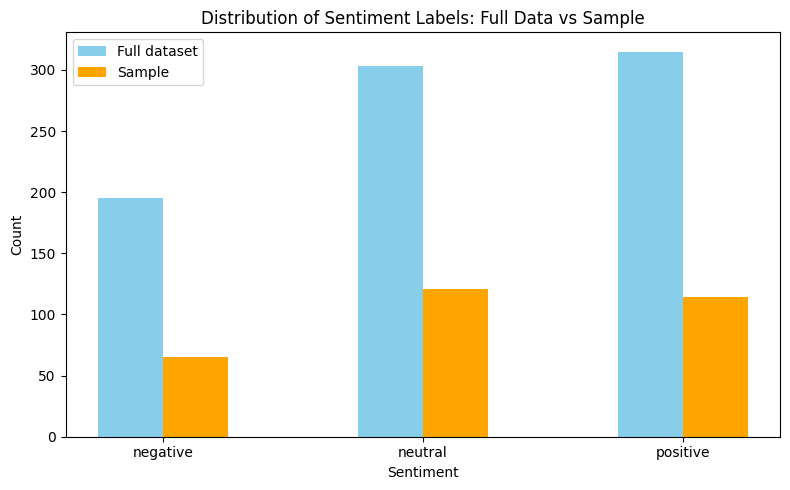

In [329]:
all_labels = ['negative', 'neutral', 'positive']
import numpy as np

x = np.arange(len(all_labels)) 
width = 0.25

plt.figure(figsize=(8,5))
plt.bar(x-width/2, full_counts, width, label='Full dataset', color='skyblue')
plt.bar(x+width/2, sample_counts, width, label='Sample', color='orange')

plt.xticks(x, all_labels)
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Distribution of Sentiment Labels: Full Data vs Sample")
plt.legend()
plt.tight_layout()
plt.show()

# observation: we can find that the distribution of sentiment labels in full data is relatively similar to sampling data
# although the positivie one should be more than neutral one
# there is a trend which the number of negative labels is less than the other two 

### Feature Creation

In [330]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [331]:
# Add a new column consist of words in title and in text
df['titleandtext'] = df.apply(
    lambda row: row['title'] + row['text'],
    axis=1
)
df.head()

,type,subreddit,title,text,subjectivity,sentiment,titleandtext
0,comment,wallstreetbets,Retardation is on the menu boys! WSB is so back,Calls on retards,1.000000,negative,Retardation is on the menu boys! WSB is so bac...
1,comment,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Stunt as in like why did they even make a big ...,0.177778,positive,Retail giant TARGET has now declined for 10 co...
2,comment,StockMarket,How do you feel about a sitting president maki...,Seeing lots of red in the ticker.,0.000000,neutral,How do you feel about a sitting president maki...
3,post,stockstobuytoday,Who knows more? $VMAR,Vision Marine Technologies Inc. is rewriting t...,0.646970,positive,Who knows more? $VMARVision Marine Technologie...
4,comment,StockMarket,The Trump administration is begging Xi Jinping...,He didnât say thank you.,0.000000,neutral,The Trump administration is begging Xi Jinping...


In [332]:
# transform the text in title and in text into unigrams
df['unigrams'] = df.apply(
    lambda row: word_tokenize(str(row['title'])) + word_tokenize(str(row['text'])),
    axis=1
)

In [333]:
df[0:4]['unigrams']

0    [Retardation, is, on, the, menu, boys, !, WSB,...
1    [Retail, giant, TARGET, has, now, declined, fo...
2    [How, do, you, feel, about, a, sitting, presid...
3    [Who, knows, more, ?, $, VMAR, Vision, Marine,...
Name: unigrams, dtype: object

In [334]:
# eliminate stop words
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
df['unigrams'] = df['unigrams'].apply(lambda tokens: [w for w in tokens if w.lower() not in stop_words])
df.unigrams

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0      [Retardation, menu, boys, !, WSB, back, Calls,...
1      [Retail, giant, TARGET, declined, 10, consecut...
2      [feel, sitting, president, making, $, 415M, on...
3      [knows, ?, $, VMAR, Vision, Marine, Technologi...
4      [Trump, administration, begging, Xi, Jinping, ...
                             ...                        
841    [Trump, administration, begging, Xi, Jinping, ...
842    [$, MRIN, Marin, Software, killed, today, ., H...
843    [$, U.S., dollar, value, (, crashing, ), read, ?]
845    [Weekend, Discussion, Thread, Weekend, April, ...
846    [Someone, post, hotline, please, ., !, [, img,...
Name: unigrams, Length: 813, dtype: object

In [335]:
# eliminate stopwords in titletext
df['titleandtext'] = df['titleandtext'].apply(
    lambda x: ' '.join([word for word in str(x).split() if word.lower() not in stop_words])
)

In [336]:
df.head()

,type,subreddit,title,text,subjectivity,sentiment,titleandtext,unigrams
0,comment,wallstreetbets,Retardation is on the menu boys! WSB is so back,Calls on retards,1.000000,negative,Retardation menu boys! WSB backCalls retards,"[Retardation, menu, boys, !, WSB, back, Calls,..."
1,comment,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Stunt as in like why did they even make a big ...,0.177778,positive,Retail giant TARGET declined 10 consecutive we...,"[Retail, giant, TARGET, declined, 10, consecut..."
2,comment,StockMarket,How do you feel about a sitting president maki...,Seeing lots of red in the ticker.,0.000000,neutral,feel sitting president making $415M one day pu...,"[feel, sitting, president, making, $, 415M, on..."
3,post,stockstobuytoday,Who knows more? $VMAR,Vision Marine Technologies Inc. is rewriting t...,0.646970,positive,knows more? $VMARVision Marine Technologies In...,"[knows, ?, $, VMAR, Vision, Marine, Technologi..."
4,comment,StockMarket,The Trump administration is begging Xi Jinping...,He didnât say thank you.,0.000000,neutral,Trump administration begging Xi Jinping call T...,"[Trump, administration, begging, Xi, Jinping, ..."


### Feature Subset Selection

In [337]:
count_vect.get_feature_names_out()[2347]

'interface'

In [338]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.titleandtext)
print(df_counts[0])

  (np.int32(0), np.int32(3573))	1
  (np.int32(0), np.int32(2744))	1
  (np.int32(0), np.int32(746))	1
  (np.int32(0), np.int32(4727))	1
  (np.int32(0), np.int32(567))	1
  (np.int32(0), np.int32(3575))	1


In [339]:
count_vect.get_feature_names_out()[2707]

'masters'

In [340]:
analyze = count_vect.build_analyzer()
analyze(df.titleandtext[0])

['retardation', 'menu', 'boys', 'wsb', 'backcalls', 'retards']

In [341]:
df_counts.shape

(813, 4769)

In [342]:
# Visualization for the distribution of words
plot_x = [count_vect.get_feature_names_out()[i] for i in range(20)]
plot_y = ["news_"+ str(i) for i in list(df.index)[0:20]]
plot_z = df_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

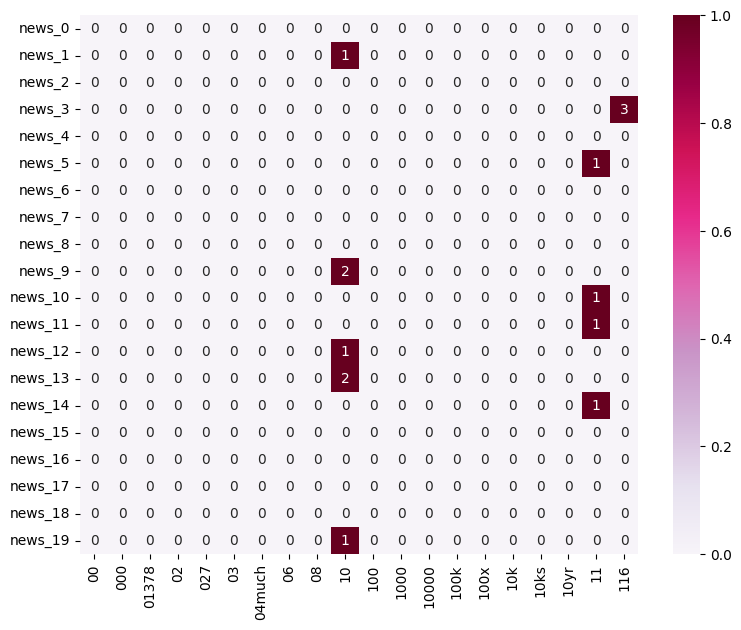

In [343]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

In [344]:
# sort X_counts via the times the words appear
# get top 30 words that appear a lot in the whole document
term_sum = np.array(df_counts.sum(axis=0)).ravel()
top_idx = term_sum.argsort()[::-1][:30]
plot_z = df_counts[0:30, top_idx].toarray()
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1],
       [2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 1, 1, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0],
       [2, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 2, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [345]:
plot_y = ["news_"+ str(i) for i in list(df.index)[0:30]]
plot_y

['news_0',
 'news_1',
 'news_2',
 'news_3',
 'news_4',
 'news_5',
 'news_6',
 'news_7',
 'news_8',
 'news_9',
 'news_10',
 'news_11',
 'news_12',
 'news_13',
 'news_14',
 'news_15',
 'news_16',
 'news_17',
 'news_18',
 'news_19',
 'news_20',
 'news_21',
 'news_22',
 'news_23',
 'news_24',
 'news_25',
 'news_26',
 'news_27',
 'news_28',
 'news_29']

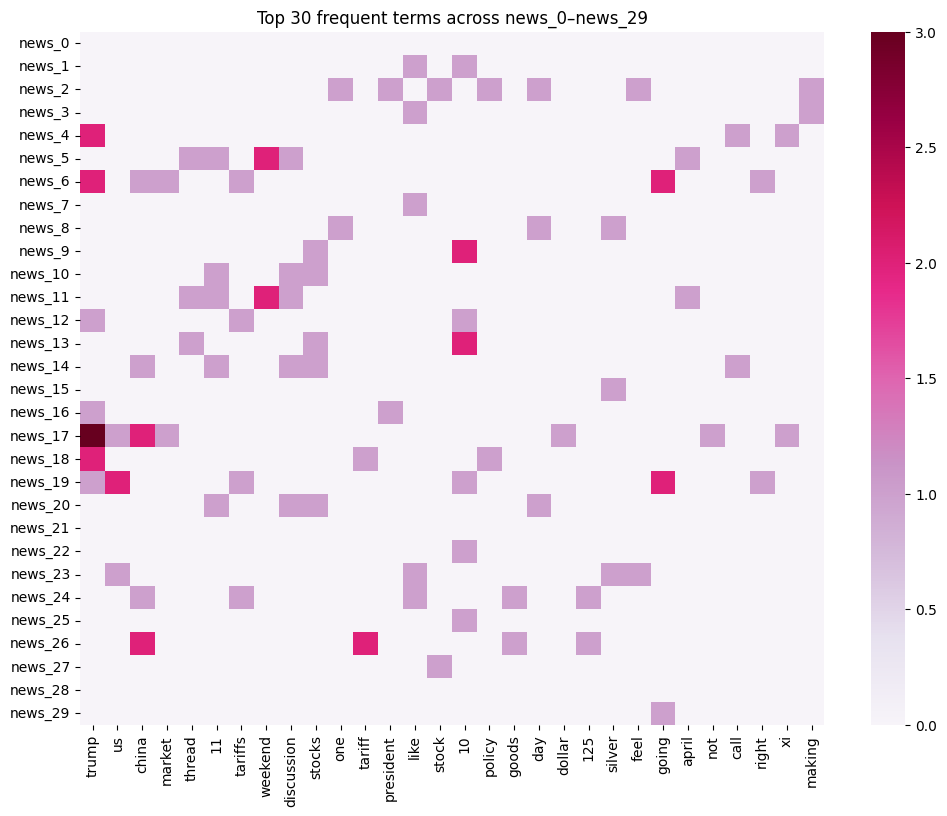

In [346]:
term_names = count_vect.get_feature_names_out()[top_idx]
df_todraw = pd.DataFrame(plot_z, columns = term_names, index = plot_y)
plt.figure(figsize=(12,9))
sns.heatmap(df_todraw, cmap="PuRd", vmin=0)
plt.title("Top 30 frequent terms across news_0–news_29")
plt.show()

### Attribute Transformation/Aggregation

In [347]:
term_frequencies = []
for j in range(0, df_counts.shape[1]):
    term_frequencies.append(sum(df_counts[:,j].toarray()))

In [348]:
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]

In [349]:
term_frequencies[0] #sum of first term: 00

np.int64(4)

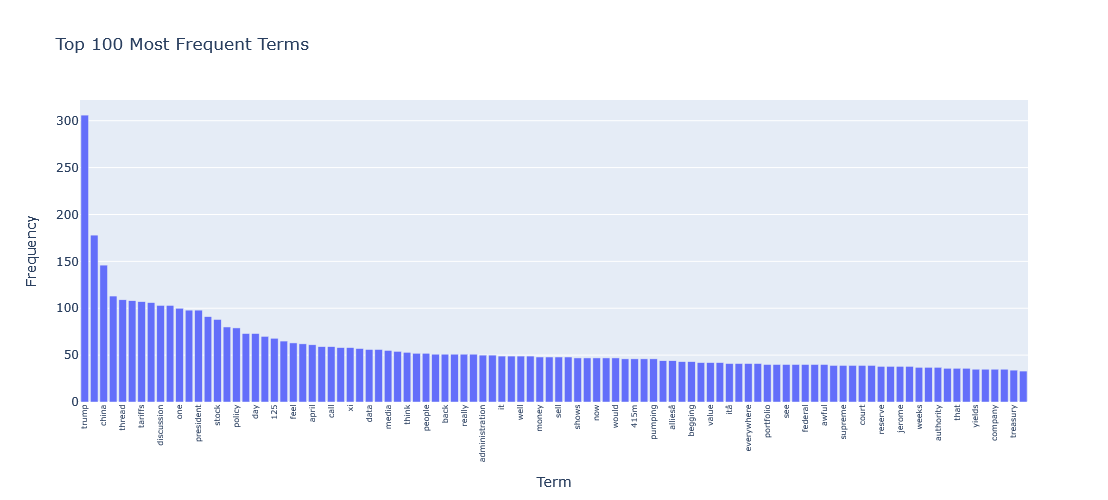

In [350]:
import plotly.express as px

term_frequencies = np.asarray(df_counts.sum(axis=0))[0]

top_n = 100
top_idx = term_frequencies.argsort()[::-1][:top_n] 

top_terms = count_vect.get_feature_names_out()[top_idx]
top_freqs = term_frequencies[top_idx]

df_top = pd.DataFrame({'term': top_terms, 'frequency': top_freqs})

fig = px.bar(df_top,
             x='term', y='frequency',
             title=f'Top {top_n} Most Frequent Terms',
             labels={'term': 'Term', 'frequency': 'Frequency'},
             width=1200, height=500)
fig.update_layout(xaxis_tickangle=270, xaxis_tickfont=dict(size=8))
fig.show()

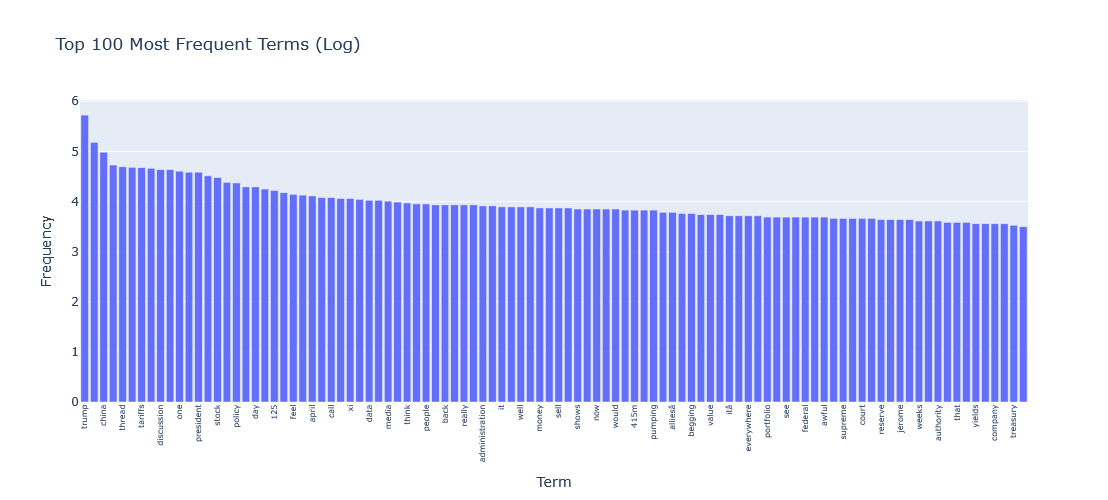

In [351]:
import math
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]

top_n = 100
top_idx = term_frequencies.argsort()[::-1][:top_n] 

top_terms = count_vect.get_feature_names_out()[top_idx]
top_freqs = np.log(term_frequencies[top_idx])

df_top = pd.DataFrame({'term': top_terms, 'frequency': top_freqs})

fig = px.bar(df_top,
             x='term', y='frequency',
             title=f'Top {top_n} Most Frequent Terms (Log)',
             labels={'term': 'Term', 'frequency': 'Frequency'},
             width=1200, height=500)
fig.update_layout(xaxis_tickangle=270, xaxis_tickfont=dict(size=8))
fig.show()

### Meaningful Visualization

Here I will use wordcloud to find if there are some words usually occur in a specific sentiment label. \
But there are so many unmeaningful tokens like ',', '$', etc. \
So I have to clean the unigrams first.

In [352]:
# clean the unigrams 
df['unigrams_clean'] = df['unigrams'].apply(
    lambda tokens: [t for t in tokens if t.isalpha()]
)
df.unigrams_clean

0      [Retardation, menu, boys, WSB, back, Calls, re...
1      [Retail, giant, TARGET, declined, consecutive,...
2      [feel, sitting, president, making, one, day, p...
3      [knows, VMAR, Vision, Marine, Technologies, re...
4      [Trump, administration, begging, Xi, Jinping, ...
                             ...                        
841    [Trump, administration, begging, Xi, Jinping, ...
842    [MRIN, Marin, Software, killed, today, Hope, s...
843                      [dollar, value, crashing, read]
845    [Weekend, Discussion, Thread, Weekend, April, ...
846                [Someone, post, hotline, please, img]
Name: unigrams_clean, Length: 813, dtype: object

In [353]:
!pip3 install wordcloud


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\USER\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [354]:
!uv add wordcloud

Resolved 169 packages in 0.78ms
Audited 159 packages in 6ms


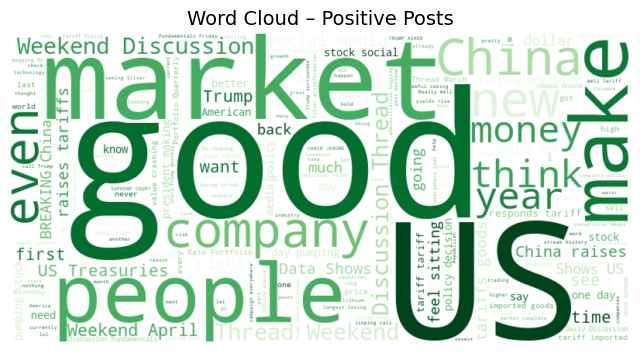

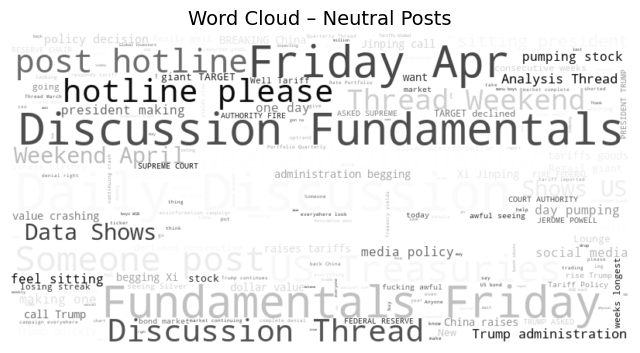

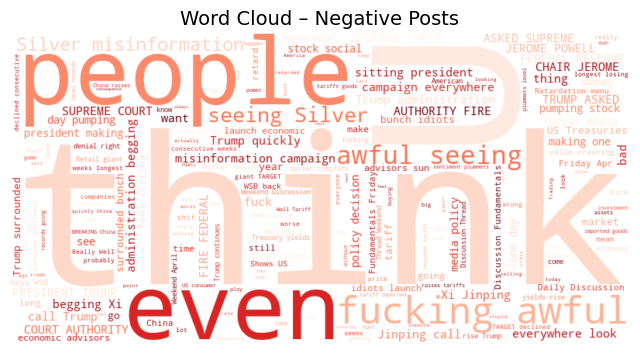

In [355]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Generate and plot Word Clouds for each sentiment
for sentiment, color in zip(['positive', 'neutral', 'negative'],
                            ['Greens', 'Greys', 'Reds']):
    
    # Combine all tokens for that sentiment into a single string
    text = ' '.join([' '.join(tokens)
                     for tokens in df[df['sentiment'] == sentiment]['unigrams_clean']])

    # Build the word cloud
    wc = WordCloud(width=800, height=400,
                   background_color='white',
                   colormap=color).generate(text)

    # Plot the word cloud
    plt.figure(figsize=(8, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud – {sentiment.capitalize()} Posts', fontsize=14)
    plt.show()

We can find that there are some dominant words in each category. \
First, for positive posts, dominant words are market, good, china, US, company, money, etc. \
Despite some positive words like good, money and so on, international trade discussions flourish and there are many posts discussed them in a positive frame. \
Second, for negative one, words like think, awful, misinformation, fucking, campaign dominant, which sometimes contain negative emotion. \
Also, the use of 'think' and 'people' might probably show subjective, frustrated tone in the posts. \
Third, there are almost neutral words falling into the category of neutral, such as techinal analysis, fundamentals, discussion, etc. \
This indicates posts mainly focused on sharing information rathan than emotion. 

# Phase 2

## Finding Frequent Patterns

In [356]:
df

,type,subreddit,title,text,subjectivity,sentiment,titleandtext,unigrams,unigrams_clean
0,comment,wallstreetbets,Retardation is on the menu boys! WSB is so back,Calls on retards,1.000000,negative,Retardation menu boys! WSB backCalls retards,"[Retardation, menu, boys, !, WSB, back, Calls,...","[Retardation, menu, boys, WSB, back, Calls, re..."
1,comment,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Stunt as in like why did they even make a big ...,0.177778,positive,Retail giant TARGET declined 10 consecutive we...,"[Retail, giant, TARGET, declined, 10, consecut...","[Retail, giant, TARGET, declined, consecutive,..."
2,comment,StockMarket,How do you feel about a sitting president maki...,Seeing lots of red in the ticker.,0.000000,neutral,feel sitting president making $415M one day pu...,"[feel, sitting, president, making, $, 415M, on...","[feel, sitting, president, making, one, day, p..."
3,post,stockstobuytoday,Who knows more? $VMAR,Vision Marine Technologies Inc. is rewriting t...,0.646970,positive,knows more? $VMARVision Marine Technologies In...,"[knows, ?, $, VMAR, Vision, Marine, Technologi...","[knows, VMAR, Vision, Marine, Technologies, re..."
4,comment,StockMarket,The Trump administration is begging Xi Jinping...,He didnât say thank you.,0.000000,neutral,Trump administration begging Xi Jinping call T...,"[Trump, administration, begging, Xi, Jinping, ...","[Trump, administration, begging, Xi, Jinping, ..."
...,...,...,...,...,...,...,...,...,...
841,comment,StockMarket,The Trump administration is begging Xi Jinping...,So countries âbegging to stop the tariffsâ...,0.000000,neutral,Trump administration begging Xi Jinping call T...,"[Trump, administration, begging, Xi, Jinping, ...","[Trump, administration, begging, Xi, Jinping, ..."
842,comment,stockstobuytoday,$MRIN Marin Software killed it today. Hope som...,Invest now it is going to shoot up tomorrow,0.000000,neutral,$MRIN Marin Software killed today. Hope someon...,"[$, MRIN, Marin, Software, killed, today, ., H...","[MRIN, Marin, Software, killed, today, Hope, s..."
843,comment,StockMarket,$ U.S. dollar value (crashing),Where can I read this?,0.000000,neutral,$ U.S. dollar value (crashing)Where read this?,"[$, U.S., dollar, value, (, crashing, ), read, ?]","[dollar, value, crashing, read]"
845,comment,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,i sold my puts so i expect cheeto to declare w...,0.000000,neutral,"Weekend Discussion Thread Weekend April 11, 20...","[Weekend, Discussion, Thread, Weekend, April, ...","[Weekend, Discussion, Thread, Weekend, April, ..."


In [357]:
from sklearn.feature_extraction.text import CountVectorizer

categories = df['sentiment'].unique()
    #categories = array(['negative', 'positive', 'neutral'], dtype=object)
category_dfs = {}
    # dictionary to store DataFrames for each category
for category in categories:
    category_dfs[category] = df[df['sentiment']==category].copy()

In [358]:
def create_term_document_df(df):
    count_vect = CountVectorizer()
        # transform text data into word counts
    df_counts = count_vect.fit_transform(df['titleandtext'])
        
    words = count_vect.get_feature_names_out()
        # row: document, column: words
    term_document_df = pd.DataFrame(df_counts.toarray(), columns=words)

    return term_document_df

In [359]:
filt_term_document_dfs = {}
    # dictionary to store term-document DataFrames for each category
for category in categories:
    filt_term_document_dfs[category] = create_term_document_df(category_dfs[category])

filt_term_document_dfs

{'negative':      01378  027  10  100  100k  100x  11  12  125  13â  ...  yesterday  yet  \
 0        0    0   0    0     0     0   0   0    0    0  ...          0    0   
 1        0    0   0    0     0     0   0   0    0    0  ...          0    0   
 2        0    0   0    0     0     0   0   0    0    0  ...          0    0   
 3        0    0   0    0     0     0   0   0    0    0  ...          0    0   
 4        0    0   0    0     0     0   1   0    0    0  ...          0    0   
 ..     ...  ...  ..  ...   ...   ...  ..  ..  ...  ...  ...        ...  ...   
 190      0    0   0    0     0     0   0   0    0    0  ...          0    0   
 191      0    0   0    0     0     0   0   0    0    0  ...          0    0   
 192      0    0   0    0     0     0   0   0    0    0  ...          0    0   
 193      0    0   0    0     0     0   0   0    1    0  ...          0    0   
 194      0    0   0    0     0     0   0   0    0    0  ...          0    0   
 
      yields  yippee  yo  

In [360]:
# category_number=0: negative, 1:positive, 2:neutral
category_number=0
print(f"Filtered Term-Document Frequency DataFrame for Category '{categories[category_number]}':")
filt_term_document_dfs[categories[category_number]]

Filtered Term-Document Frequency DataFrame for Category 'negative':


,01378,027,10,100,100k,100x,11,12,125,13â,...,yesterday,yet,yields,yippee,yo,you,yourselves,youtube,youâ,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
191,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
192,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
193,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


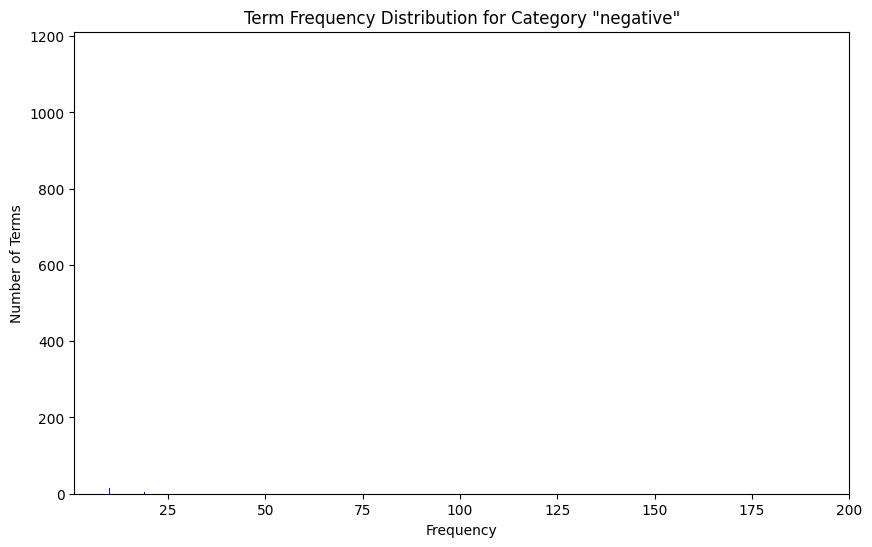

In [361]:
# get total frequency for each word
category_number=0
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Visualization
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=5000, color='blue')
plt.title(f'Term Frequency Distribution for Category "{categories[category_number]}"')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()

Since I have eliminated stopwords in the phase 1, we can see that the graph is really different from the graph in Lab1-Master. \
In this case, I will filter bottom x% of words instead of top 5%.

In [362]:
category_number = 0
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

sorted_indices = np.argsort(word_counts)
    # in ascending order
sorted_counts = word_counts[sorted_indices]

# Calculate the index corresponding to the bottom 3% least frequent terms
total_terms = len(sorted_counts)
bottom_1_percent_index = int(0.03 * total_terms)

# Get the indices of the bottom 3% least frequent terms
bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]

# Filter terms that belong to the bottom 3% based on their rank
filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in bottom_1_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in bottom 3%: {bottom_1_percent_index}")
print(f"Filtered terms: {filtered_words}")

Category: negative
Number of terms in bottom 3%: 52
Filtered terms: ['14th', '140', '13â', '100x', 'xeqt', '2011', '1952wow', '1952went', '1952trump', '1952this', '1952literally', '1952i', '18itâ', '18be', '18bank', '17th', 'ws', 'writing', 'wouldnâ', 'worthless', 'worth', 'worseâ', 'working', 'worked', '2025consumer', 'yippee', 'yelling', 'yeahâ', 'yeah', 'ya', 'yourselves', '14â', '2â', '2s', '27', 'word', 'wont', 'wonder', 'wobbling', 'within', 'wit', 'windows', 'willingness', 'willingly', 'willing', 'whose', 'whos', '250', 'abolish', 'ability', '9k', '95']


After testing 0.03 bottom words, I find that 3% bottom words include many unique tokens. \
So I decide to eliminate 3%.

In [363]:
category_number=0 #You can change it from 0 to 3

# Filter the bottom 3% based on their sum across all documents
def filter_bottom_words_by_sum(term_document_df, bottom_percent=0.03):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') 
        #Here we print which words correspond to the bottom percentage we filter
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
term_document_dfs = {}

for category in categories:
    print(f'\nFor category "{category}" we filter the following words:')
    term_document_dfs[category] = filter_bottom_words_by_sum(filt_term_document_dfs[category])

# Example: Display the filtered DataFrame for one of the categories
print(f"Filtered Term-Document Frequency DataFrame for Category '{categories[category_number]}':")
term_document_dfs[categories[category_number]]


For category "negative" we filter the following words:
Bottom 3.0% words: 
14th             1
140              1
13â              1
100x             1
xeqt             1
2011             1
1952wow          1
1952went         1
1952trump        1
1952this         1
1952literally    1
1952i            1
18itâ            1
18be             1
18bank           1
17th             1
ws               1
writing          1
wouldnâ          1
worthless        1
worth            1
worseâ           1
working          1
worked           1
2025consumer     1
yippee           1
yelling          1
yeahâ            1
yeah             1
ya               1
yourselves       1
14â              1
2â               1
2s               1
27               1
word             1
wont             1
wonder           1
wobbling         1
within           1
wit              1
windows          1
willingness      1
willingly        1
willing          1
whose            1
whos             1
250              1
abolish     

,01378,027,10,100,100k,11,12,125,14,145,...,year,years,yesterday,yet,yields,yo,you,youtube,youâ,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
191,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
192,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
193,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [364]:
import builtins

_orig_open = open

def safe_open(*args, **kwargs):
    if len(args) > 0 and isinstance(args[0], str) and args[0].endswith('.csv'):
        kwargs['encoding'] = 'latin-1'   # Force Latin-1
        kwargs['errors'] = 'ignore'      # Ignore bad characters
    return _orig_open(*args, **kwargs)


builtins.open = safe_open

In [365]:
from PAMI.extras.convert.DF2DB import DF2DB            

# Loop through the dictionary of term-document DataFrames
for category in term_document_dfs:
    # Replace dots with underscores in the category name to avoid errors in the file creation
    category_safe = category.replace('.', '_')
    
    # Create the DenseFormatDF object and convert to a transactional database
    obj = DF2DB(term_document_dfs[category])           
        
    obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)

Database size (total no of transactions) : 195
Number of items : 1695
Minimum Transaction Size : 6
Average Transaction Size : 21.42051282051282
Maximum Transaction Size : 77
Standard Deviation Transaction Size : 11.704375239072572
Variance in Transaction Sizes : 137.6985461274121
Sparsity : 0.9873625293094319


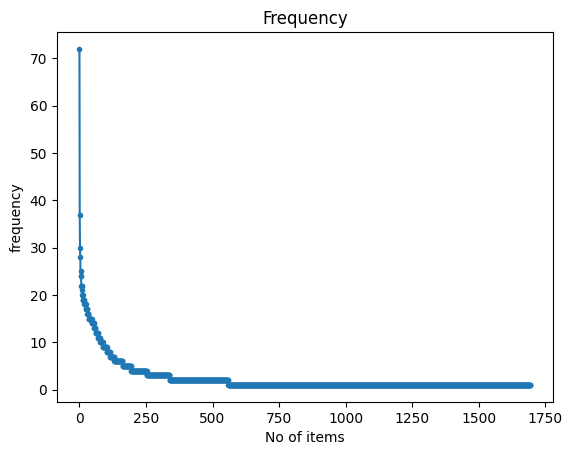

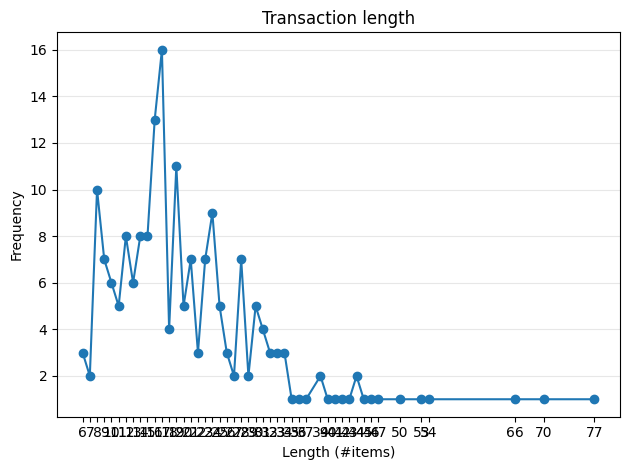

In [366]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_negative.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 315
Number of items : 3212
Minimum Transaction Size : 3
Average Transaction Size : 26.787301587301588
Maximum Transaction Size : 230
Standard Deviation Transaction Size : 25.654032091658394
Variance in Transaction Sizes : 660.2253159437873
Sparsity : 0.9916602423451738


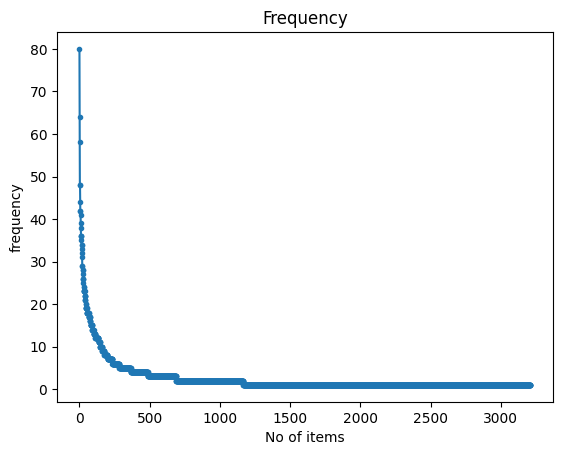

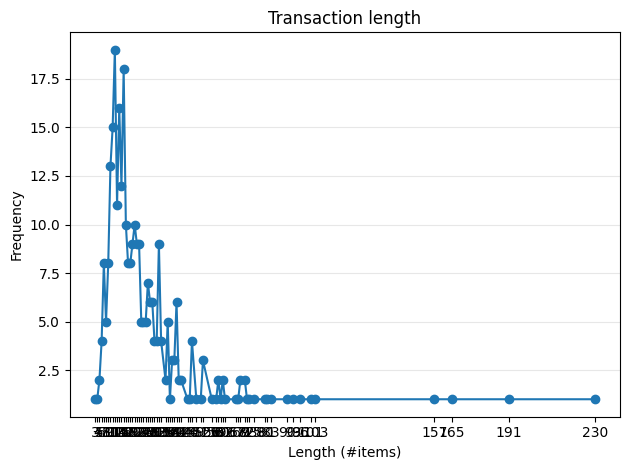

In [367]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_positive.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 303
Number of items : 1468
Minimum Transaction Size : 3
Average Transaction Size : 12.323432343234323
Maximum Transaction Size : 34
Standard Deviation Transaction Size : 5.500166103211276
Variance in Transaction Sizes : 30.351998776036545
Sparsity : 0.9916052913193226


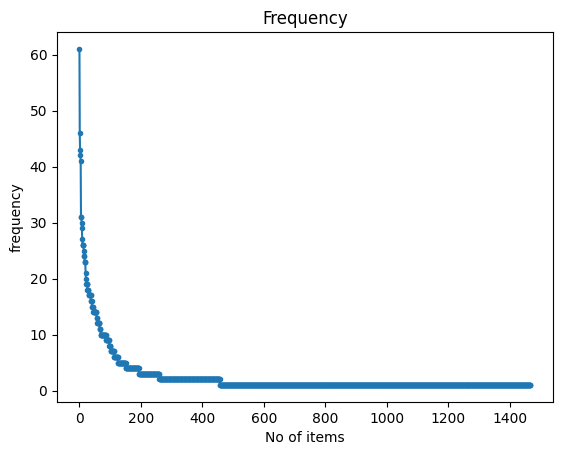

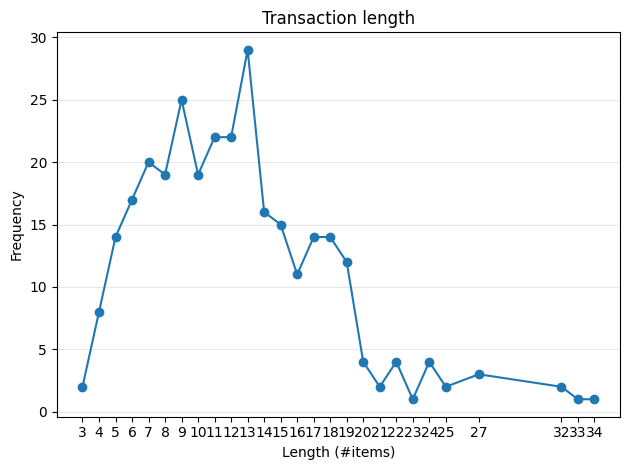

In [368]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_neutral.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

In [379]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=18
obj0 = alg.FPGrowth(iFile='td_freq_db_negative.csv', minSup=minSup)
obj0.mine()
frequentPatternsDF_negative = obj0.getPatternsAsDataFrame()
print('Total No of patterns: '+str(len(frequentPatternsDF_negative)))
print('Runtime '+str(obj0.getRuntime()))

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 146
Runtime 0.00420379638671875


In [380]:
obj0.save('freq_patterns_negative_minSup18.txt')
frequentPatternsDF_negative

,Patterns,Support
0,campaign,18
1,campaign\tfucking,18
2,campaign\tawful,18
3,fucking\tcampaign\tawful,18
4,everywhere,18
...,...,...
141,tariffs,25
142,china,28
143,president,30
144,us,37


In [381]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=22
obj1 = alg.FPGrowth(iFile='td_freq_db_positive.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_positive = obj1.getPatternsAsDataFrame()
print('Total No of patterns: '+str(len(frequentPatternsDF_positive)))
print('Runtime '+str(obj1.getRuntime()))

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 77
Runtime 0.008059501647949219


In [382]:
obj1.save('freq_patterns_positive_minSup22.txt')
frequentPatternsDF_positive

,Patterns,Support
0,first,22
1,back,22
2,well,22
3,data,22
4,even,23
...,...,...
72,china,58
73,china\tus,22
74,us,64
75,us\ttrump,22


In [383]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=18
obj2 = alg.FPGrowth(iFile='td_freq_db_neutral.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_neutral = obj2.getPatternsAsDataFrame()
print('Total No of patterns: '+str(len(frequentPatternsDF_neutral)))
print('Runtime '+str(obj1.getRuntime()))

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 158
Runtime 0.008059501647949219


In [384]:
obj2.save('freq_patterns_neutral_minSup18.txt')
frequentPatternsDF_neutral

,Patterns,Support
0,tariff,18
1,analysis,18
2,data,18
3,dumping,18
4,call,19
...,...,...
153,thread,42
154,discussion,43
155,discussion\t11,43
156,11,46


### Discard Common Patterns

In [391]:
import pandas as pd

dfs = [frequentPatternsDF_negative, frequentPatternsDF_positive, frequentPatternsDF_neutral]

# identify patterns appear in more than one category
pattern_counts = {}
for _dfs in dfs:
    for pattern in _dfs['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate total number of patterns
total_patterns_count = sum(len(_dfs) for _dfs in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# Merge the filtered dataframes into a final dataframe
filtered_dfs = []
for _dfs in dfs:
    filtered_df = _dfs[_dfs['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

print(final_pattern_df)
print(f"Number of patterns discarded: {discarded_patterns_count}")

                     Patterns  Support
166                      good       36
164                     right       34
290                     daily       29
155                       not       28
154                    dollar       28
..                        ...      ...
4                  everywhere       18
3    fucking\tcampaign\tawful       18
2             campaign\tawful       18
1           campaign\tfucking       18
0                    campaign       18

[301 rows x 2 columns]
Number of patterns discarded: 80


### Feature Augmentation

In [392]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
df_tdm = count_vect.fit_transform(df['titleandtext'])
terms = count_vect.get_feature_names_out()

df['tokenized_text'] = df['text'].str.split().apply(set)

pattern_matrix = pd.DataFrame(0, index=df.index, columns=final_pattern_df['Patterns'])

for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())
    pattern_matrix[pattern] = df['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

tdm_df = pd.DataFrame(df_tdm.toarray(), columns=terms, index=df.index)
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)
augmented_df

,00,000,01378,02,027,03,04much,06,08,10,...,fucking\tawful\tseeing\tcampaign,seeing\teverywhere,fucking\tseeing\teverywhere,awful\tseeing\teverywhere,everywhere\tfucking,everywhere,fucking\tcampaign\tawful,campaign\tawful,campaign\tfucking,campaign
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
842,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
843,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
845,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [394]:
from PAMI.frequentPattern.maximal import MaxFPGrowth  as alg

# Run trials with different minimum supports
for minSup in [3, 6, 9]:
    print(f"\n--- MaxFP-Growth Frequent Pattern Mining (minSup={minSup}) ---")
    
    obj = alg.MaxFPGrowth(iFile='td_freq_db_positive.csv', minSup=minSup)
    obj.mine()
    
    patterns_df = obj.getPatternsAsDataFrame()
    print(patterns_df)
    print(f"Total number of patterns: {len(patterns_df)}")
    print(f"Runtime: {obj.getRuntime()} seconds")
    print(f'-------------------------------------')


--- MaxFP-Growth Frequent Pattern Mining (minSup=3) ---
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
                                               Patterns  Support
0     trump president federal asked fire court reser...        3
1                                               online         3
2                                                  jan         3
3                                                 fall         3
4                                                  him         3
...                                                 ...      ...
1711                                trump like tariffs         4
1712                        trump us china one tariffs         3
1713                     trump us china market tariffs         3
1714                                  us thread market         3
1715                                 us china one like         3

[1716 rows x 2 columns]
Total number of patterns: 1716
Runtime: 0.083997964859

## Dimensionality Reduction

In [396]:
#Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

In [398]:
X_pca_tdm.shape

(813, 2)

In [399]:
X_tsne_tdm.shape

(813, 2)

In [400]:
X_umap_tdm.shape

(813, 2)

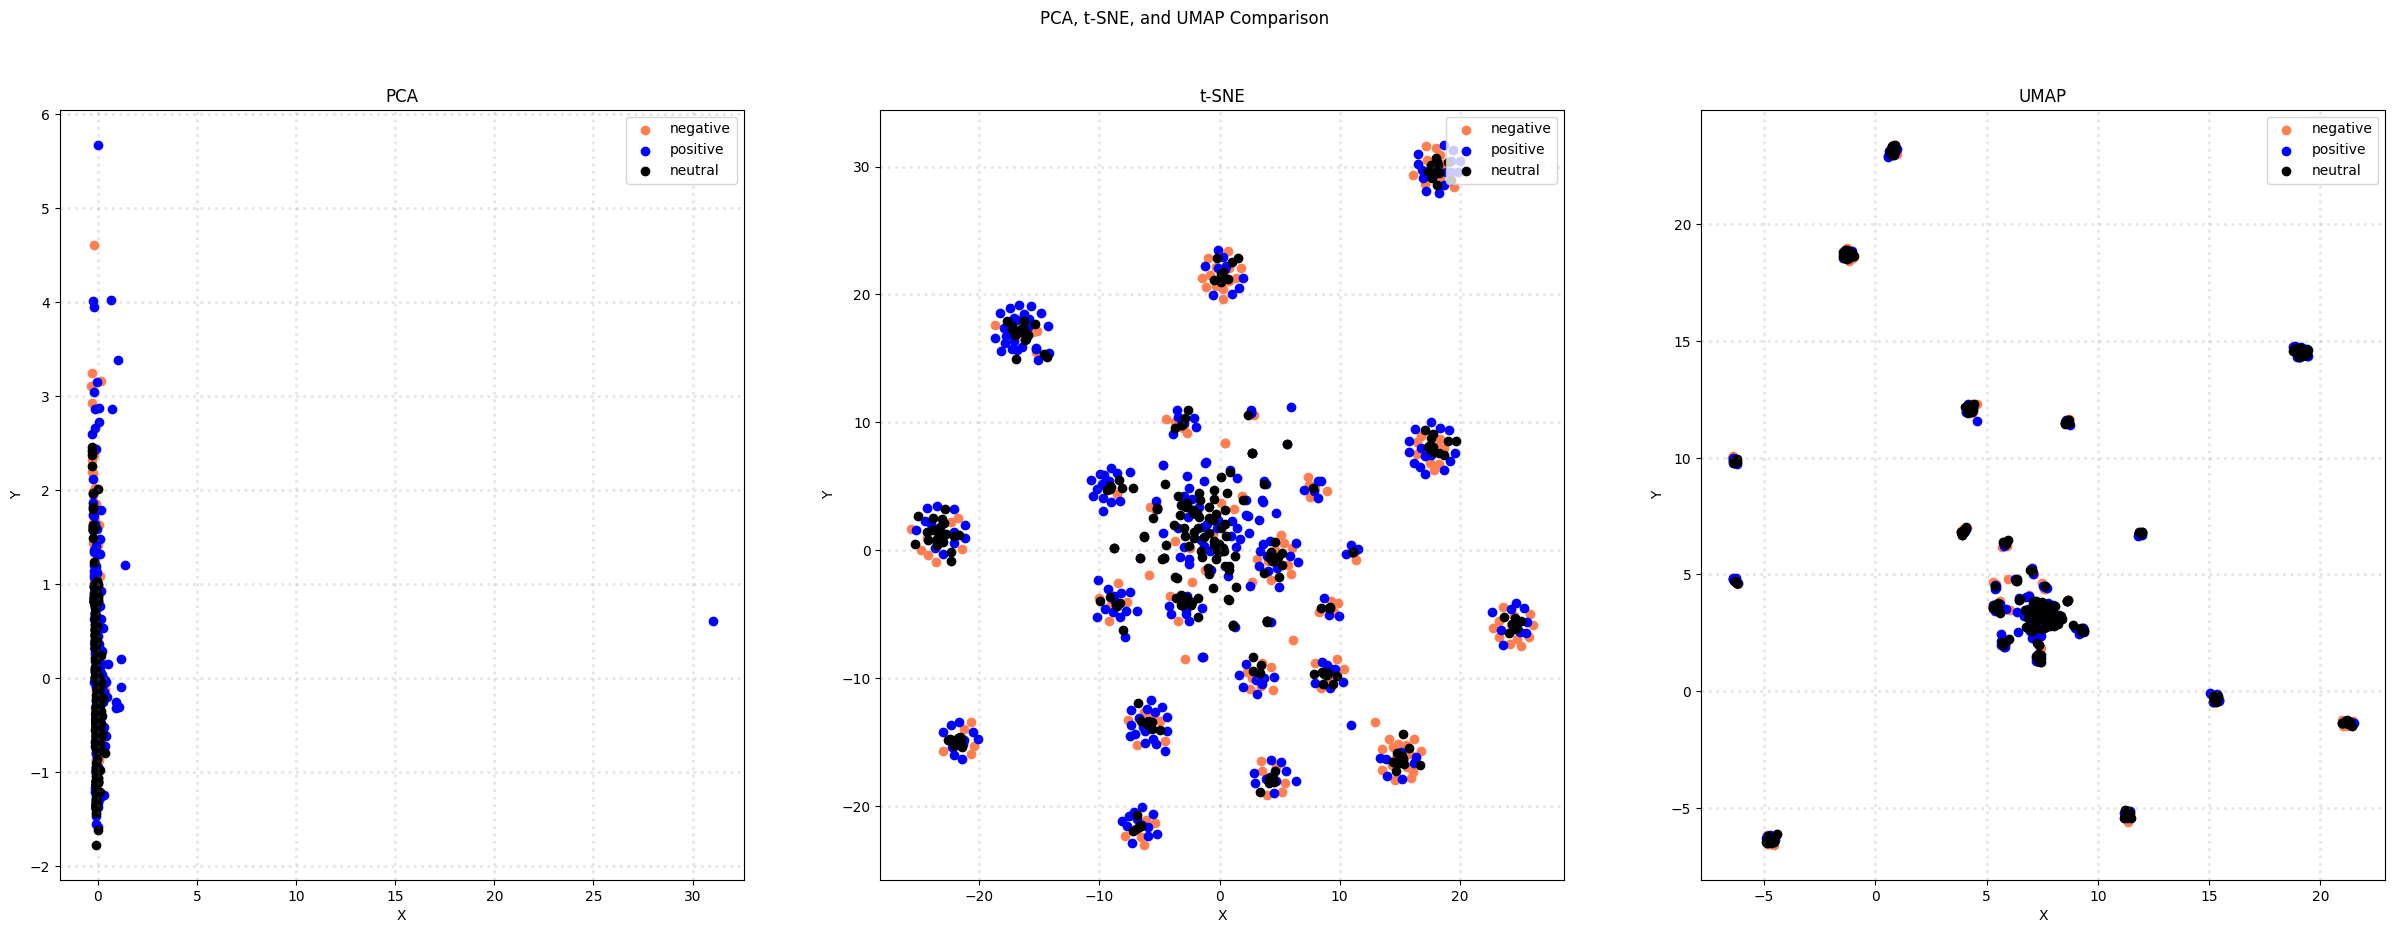

In [402]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = df['sentiment'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[df['sentiment'] == category].T[0]
        ys = X_reduced[df['sentiment'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')

plt.show()

It seems that the PCA method failed to separate semtiment classes. \
While t-SNE and UMAP could form many local clusters.

### Within Pattern-Augentated Data

In [403]:
#This might take a couple of minutes to execute
#Applying dimensionality reduction with both the document-term frequency data and the pattern derived data
# Apply PCA, t-SNE, and UMAP to the data
X_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

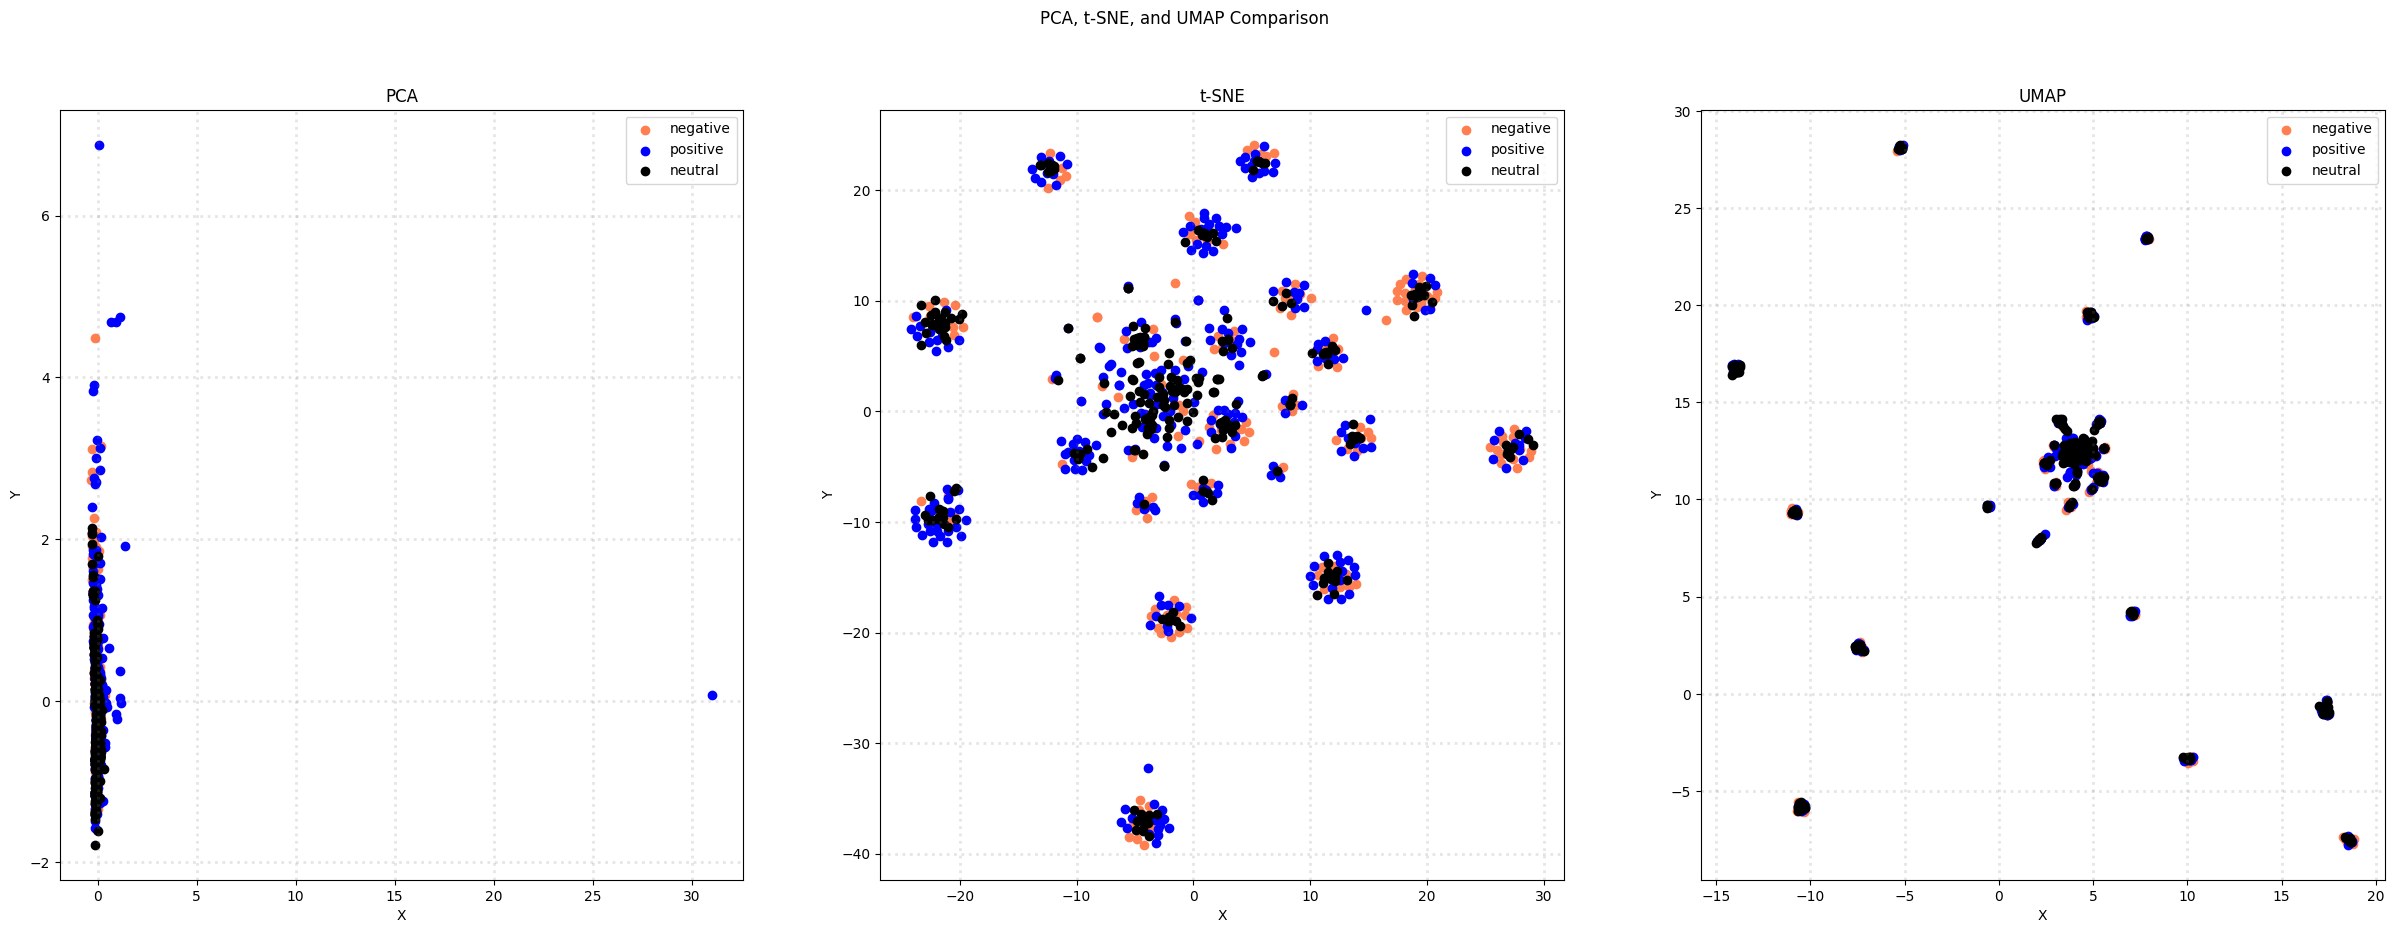

In [404]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = df['sentiment'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[df['sentiment'] == category].T[0]
        ys = X_reduced[df['sentiment'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_aug, 'PCA')
plot_scatter(axes[1], X_tsne_aug, 't-SNE')
plot_scatter(axes[2], X_umap_aug, 'UMAP')

plt.show()

The situation is quite the same as the result with not-augmentated data. \
It seems that the PCA method failed to separate semtiment classes.\
While t-SNE slightly altered the position, the groups seem cluster in the same way. \
However, the UMAP seems to be the same.

### 3D Dimensionality Reduction

C:\Users\USER\Desktop\DataMining\Lab\DM2025-Lab1-Exercise\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



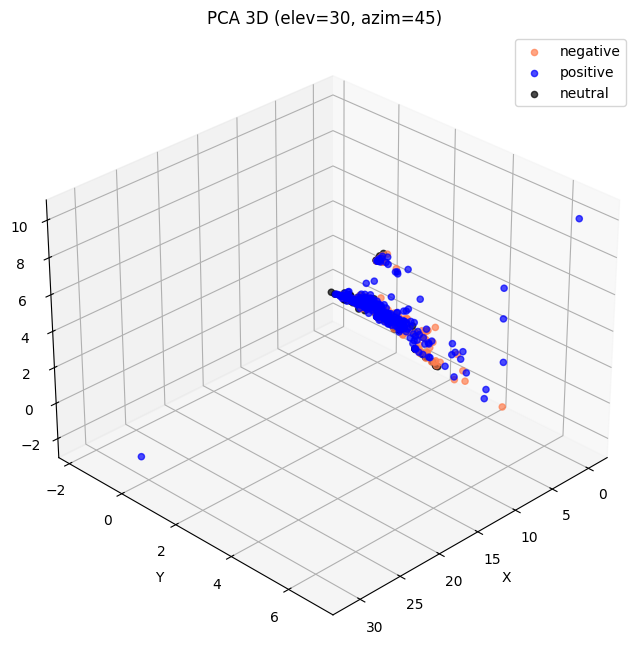

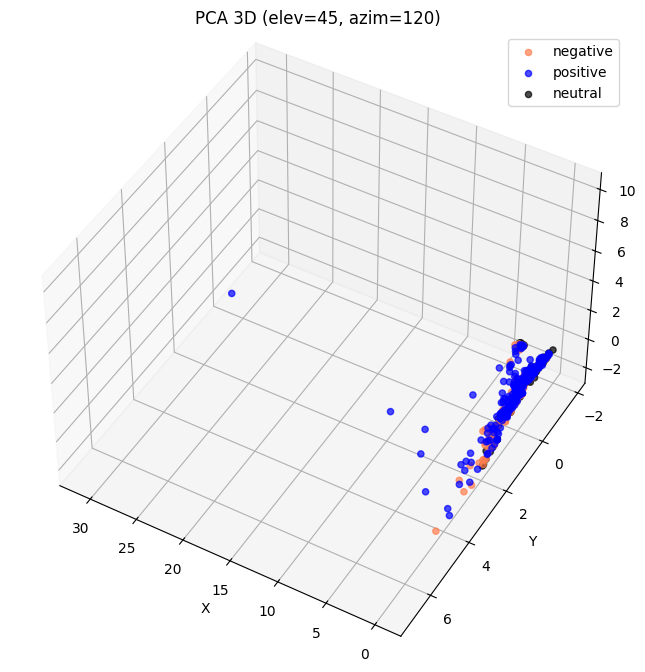

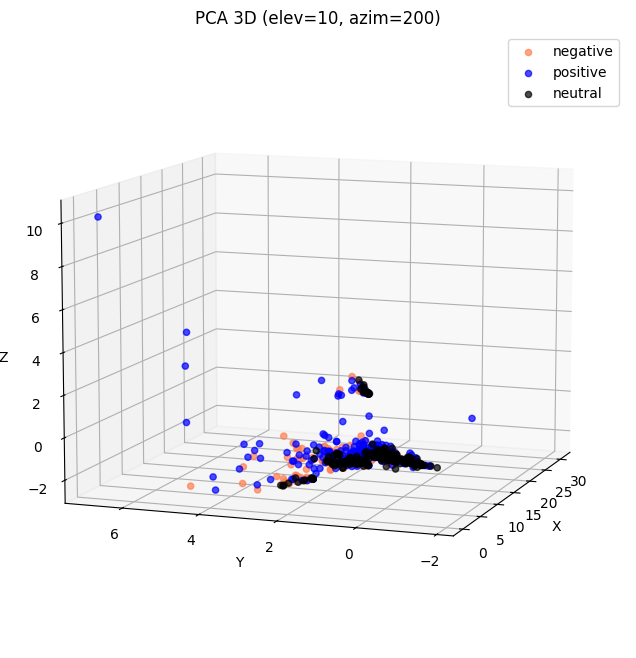

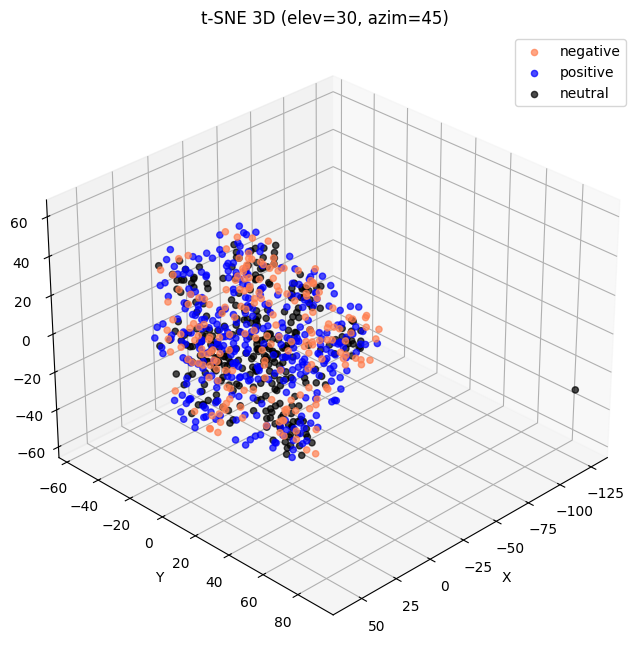

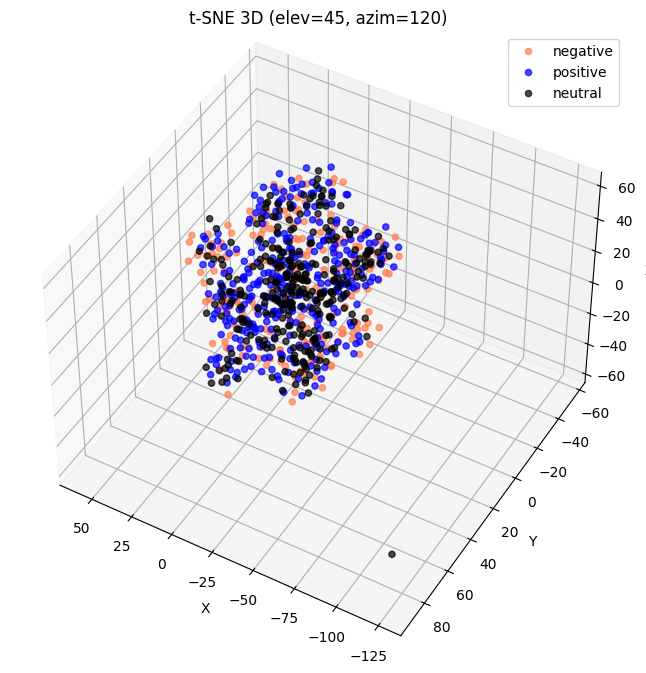

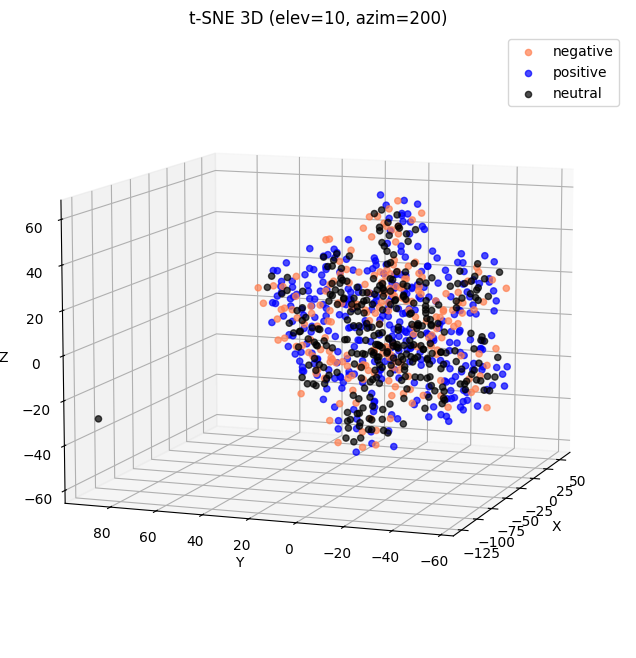

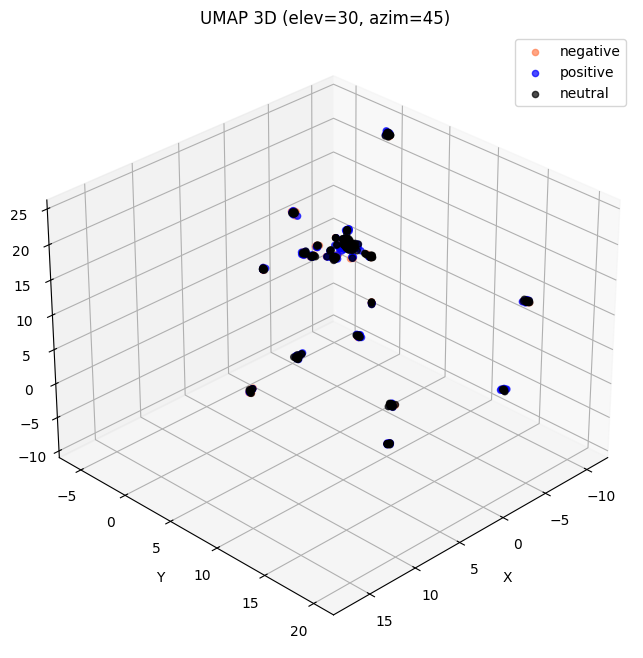

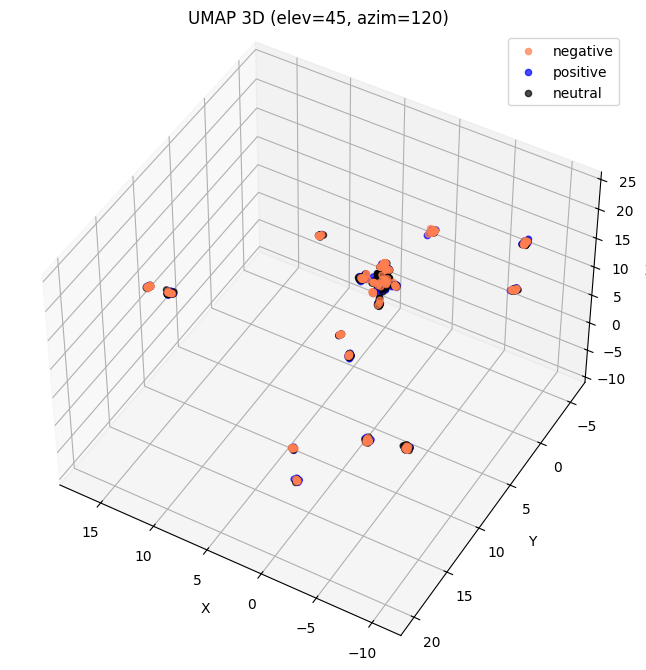

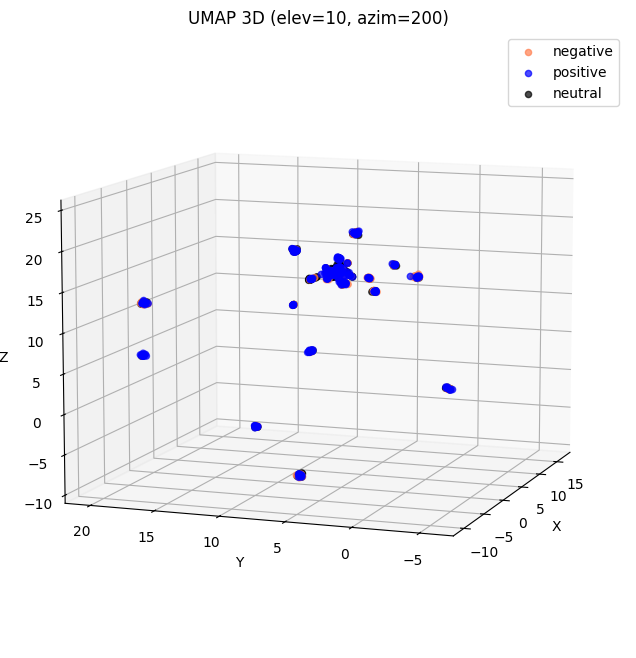

In [410]:
#Answer Here
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D   # 3-D plotting
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap

#  reduce to 3 dimensions 
X_pca_3d = PCA(n_components=3).fit_transform(augmented_df)
X_tsne_3d = TSNE(n_components=3, random_state=42).fit_transform(augmented_df)
X_umap_3d = umap.UMAP(n_components=3, random_state=42).fit_transform(augmented_df)

# define a 3-D scatter function 
def plot_3d(X_reduced, title, elev=30, azim=45):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111, projection='3d')

    for c, category in zip(col, categories):
        xs = X_reduced[df['sentiment'] == category, 0]
        ys = X_reduced[df['sentiment'] == category, 1]
        zs = X_reduced[df['sentiment'] == category, 2]
        ax.scatter(xs, ys, zs, c=c, label=category, alpha=0.7)

    ax.view_init(elev=elev, azim=azim)   # camera angle
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend()
    plt.show()

# show from at least 3 different angles
for elev, azim in [(30,45), (45,120), (10,200)]:
    plot_3d(X_pca_3d, f'PCA 3D (elev={elev}, azim={azim})', elev, azim)

for elev, azim in [(30,45), (45,120), (10,200)]:
    plot_3d(X_tsne_3d, f't-SNE 3D (elev={elev}, azim={azim})', elev, azim)

for elev, azim in [(30,45), (45,120), (10,200)]:
    plot_3d(X_umap_3d, f'UMAP 3D (elev={elev}, azim={azim})', elev, azim)

## Binarization

In [412]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(df.sentiment)

LabelBinarizer()

In [413]:
df['bin_category'] = mlb.transform(df['sentiment']).tolist()

In [414]:
df

,type,subreddit,title,text,subjectivity,sentiment,titleandtext,unigrams,unigrams_clean,tokenized_text,bin_category
0,comment,wallstreetbets,Retardation is on the menu boys! WSB is so back,Calls on retards,1.000000,negative,Retardation menu boys! WSB backCalls retards,"[Retardation, menu, boys, !, WSB, back, Calls,...","[Retardation, menu, boys, WSB, back, Calls, re...","{on, Calls, retards}","[1, 0, 0]"
1,comment,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Stunt as in like why did they even make a big ...,0.177778,positive,Retail giant TARGET declined 10 consecutive we...,"[Retail, giant, TARGET, declined, 10, consecut...","[Retail, giant, TARGET, declined, consecutive,...","{why, as, in, ever, starting, first, they, com...","[0, 0, 1]"
2,comment,StockMarket,How do you feel about a sitting president maki...,Seeing lots of red in the ticker.,0.000000,neutral,feel sitting president making $415M one day pu...,"[feel, sitting, president, making, $, 415M, on...","[feel, sitting, president, making, one, day, p...","{lots, in, ticker., red, Seeing, the, of}","[0, 1, 0]"
3,post,stockstobuytoday,Who knows more? $VMAR,Vision Marine Technologies Inc. is rewriting t...,0.646970,positive,knows more? $VMARVision Marine Technologies In...,"[knows, ?, $, VMAR, Vision, Marine, Technologi...","[knows, VMAR, Vision, Marine, Technologies, re...","{skill,, highlights, achieves, Points**, have,...","[0, 0, 1]"
4,comment,StockMarket,The Trump administration is begging Xi Jinping...,He didnât say thank you.,0.000000,neutral,Trump administration begging Xi Jinping call T...,"[Trump, administration, begging, Xi, Jinping, ...","[Trump, administration, begging, Xi, Jinping, ...","{you., He, didnât, say, thank}","[0, 1, 0]"
...,...,...,...,...,...,...,...,...,...,...,...
841,comment,StockMarket,The Trump administration is begging Xi Jinping...,So countries âbegging to stop the tariffsâ...,0.000000,neutral,Trump administration begging Xi Jinping call T...,"[Trump, administration, begging, Xi, Jinping, ...","[Trump, administration, begging, Xi, Jinping, ...","{a, âbegging, tariffsâ, both, ways, countr...","[0, 1, 0]"
842,comment,stockstobuytoday,$MRIN Marin Software killed it today. Hope som...,Invest now it is going to shoot up tomorrow,0.000000,neutral,$MRIN Marin Software killed today. Hope someon...,"[$, MRIN, Marin, Software, killed, today, ., H...","[MRIN, Marin, Software, killed, today, Hope, s...","{going, it, tomorrow, shoot, up, now, to, Inve...","[0, 1, 0]"
843,comment,StockMarket,$ U.S. dollar value (crashing),Where can I read this?,0.000000,neutral,$ U.S. dollar value (crashing)Where read this?,"[$, U.S., dollar, value, (, crashing, ), read, ?]","[dollar, value, crashing, read]","{Where, can, I, this?, read}","[0, 1, 0]"
845,comment,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,i sold my puts so i expect cheeto to declare w...,0.000000,neutral,"Weekend Discussion Thread Weekend April 11, 20...","[Weekend, Discussion, Thread, Weekend, April, ...","[Weekend, Discussion, Thread, Weekend, April, ...","{so, sold, war, declare, puts, my, expect, i, ...","[0, 1, 0]"


## Data Exploration

In [417]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = df.iloc[30]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = df.iloc[300]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = df.iloc[500]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

In [418]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['> Still seems like an awful investment\r\n\r\nThat sentiment, above everything else happening, is what has me most terrified.\r\n\r\nFaith in the US economy is crumbling.']
['Sooo 3 cent is crashing huh?']
['Found the killjoy.']


In [419]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [420]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.178885
Cosine Similarity using count bw 1 and 3: 0.115470
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


C:\Users\USER\AppData\Local\Temp\ipykernel_30992\452772485.py:13: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\USER\AppData\Local\Temp\ipykernel_30992\452772485.py:14: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\USER\AppData\Local\Temp\ipykernel_30992\452772485.py:15: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\USER\AppData\Local\Temp\ipykernel_30992\452772485.py:17: DeprecationWarning:

Conversion of an array with ndim > 0 to a scal

## Data Classification

### Naive Bayes

In [426]:
#Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

X_features = augmented_df

y_labels = df['sentiment']

print(X_features)
print(y_labels)

     00  000  01378  02  027  03  04much  06  08  10  ...  \
0     0    0      0   0    0   0       0   0   0   0  ...   
1     0    0      0   0    0   0       0   0   0   1  ...   
2     0    0      0   0    0   0       0   0   0   0  ...   
3     0    0      0   0    0   0       0   0   0   0  ...   
4     0    0      0   0    0   0       0   0   0   0  ...   
..   ..  ...    ...  ..  ...  ..     ...  ..  ..  ..  ...   
841   0    0      0   0    0   0       0   0   0   0  ...   
842   0    0      0   0    0   0       0   0   0   0  ...   
843   0    0      0   0    0   0       0   0   0   0  ...   
845   0    0      0   0    0   0       0   0   0   0  ...   
846   0    0      0   0    0   0       0   0   0   0  ...   

     fucking\tawful\tseeing\tcampaign  seeing\teverywhere  \
0                                   0                   0   
1                                   0                   0   
2                                   0                   0   
3                      

In [433]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_features, y_labels, test_size=0.3, random_state=42, stratify=y_labels
)

print(X_train.shape, X_test.shape)

(569, 5070) (244, 5070)


In [434]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Initialize the model
nb_model = MultinomialNB()

# Train
nb_model.fit(X_train, y_train)

# Predict
y_pred = nb_model.predict(X_test)

In [435]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.5491803278688525

Classification Report:
              precision    recall  f1-score   support

    negative       0.48      0.52      0.50        58
     neutral       0.61      0.57      0.59        91
    positive       0.54      0.55      0.54        95

    accuracy                           0.55       244
   macro avg       0.54      0.55      0.54       244
weighted avg       0.55      0.55      0.55       244



### Desicion Tree

In [438]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

X_aug = augmented_df
y = df['sentiment']

X_train_aug, X_test_aug, y_train, y_test = train_test_split(
    X_aug, y, test_size=0.3, random_state=42, stratify=y
)

dt_model = DecisionTreeClassifier(
    criterion='entropy',      # or "gini"
    max_depth=None,           # allow full depth (can tune later)
    min_samples_split=2,      # default
    random_state=42
)
dt_model.fit(X_train_aug, y_train)

y_pred_aug = dt_model.predict(X_test_aug)

print("Decision Tree Accuracy (Augmented TDM):", accuracy_score(y_test, y_pred_aug))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_aug))

Decision Tree Accuracy (Augmented TDM): 0.5491803278688525

Classification Report:
              precision    recall  f1-score   support

    negative       0.41      0.41      0.41        58
     neutral       0.57      0.76      0.65        91
    positive       0.63      0.43      0.51        95

    accuracy                           0.55       244
   macro avg       0.54      0.53      0.53       244
weighted avg       0.56      0.55      0.54       244



## TF-IDF

In [442]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

tfidf_vect = TfidfVectorizer(stop_words='english')
X_tfidf = tfidf_vect.fit_transform(df['titleandtext'])
print("TF-IDF matrix shape:", X_tfidf.shape)

TF-IDF matrix shape: (813, 4558)


In [445]:
count_vect = CountVectorizer(stop_words='english')
X_count = count_vect.fit_transform(df['titleandtext'])

print("Count matrix shape:", X_count.shape)

Count matrix shape: (813, 4558)


In [446]:
y = df['sentiment']

X_train_count, X_test_count, y_train, y_test = train_test_split(
    X_count, y, test_size=0.3, random_state=42, stratify=y
)

X_train_tfidf, X_test_tfidf, _, _ = train_test_split(
    X_tfidf, y, test_size=0.3, random_state=42, stratify=y
)

In [448]:
# Train Naive Bayes Model
# Word Frequency (Count) 
nb_count = MultinomialNB()
nb_count.fit(X_train_count, y_train)
y_pred_count = nb_count.predict(X_test_count)

print("Naive Bayes (Count Features)")
print("Accuracy:", accuracy_score(y_test, y_pred_count))
print(classification_report(y_test, y_pred_count))


# TF-IDF 
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_tfidf, y_train)
y_pred_tfidf = nb_tfidf.predict(X_test_tfidf)

print("Naive Bayes (TF-IDF Features)")
print("Accuracy:", accuracy_score(y_test, y_pred_tfidf))
print(classification_report(y_test, y_pred_tfidf))

Naive Bayes (Count Features)
Accuracy: 0.5286885245901639
              precision    recall  f1-score   support

    negative       0.48      0.55      0.51        58
     neutral       0.58      0.60      0.59        91
    positive       0.51      0.44      0.47        95

    accuracy                           0.53       244
   macro avg       0.52      0.53      0.53       244
weighted avg       0.53      0.53      0.53       244

Naive Bayes (TF-IDF Features)
Accuracy: 0.48770491803278687
              precision    recall  f1-score   support

    negative       0.43      0.17      0.25        58
     neutral       0.51      0.62      0.56        91
    positive       0.47      0.56      0.51        95

    accuracy                           0.49       244
   macro avg       0.47      0.45      0.44       244
weighted avg       0.48      0.49      0.47       244



### TFIDF with augmented df

In [449]:
import scipy.sparse as sp

# Convert pattern_matrix (dense) to sparse if needed
pattern_sparse = sp.csr_matrix(pattern_matrix.values)

# Combine TF-IDF + Pattern features
X_tfidf_aug = sp.hstack([X_tfidf, pattern_sparse])

# Split and train again
X_train_tfidf_aug, X_test_tfidf_aug, y_train, y_test = train_test_split(
    X_tfidf_aug, y, test_size=0.3, random_state=42, stratify=y
)

nb_tfidf_aug = MultinomialNB()
nb_tfidf_aug.fit(X_train_tfidf_aug, y_train)
y_pred_tfidf_aug = nb_tfidf_aug.predict(X_test_tfidf_aug)

print("Naive Bayes (TF-IDF + Pattern Features)")
print("Accuracy:", accuracy_score(y_test, y_pred_tfidf_aug))
print(classification_report(y_test, y_pred_tfidf_aug))

Naive Bayes (TF-IDF + Pattern Features)
Accuracy: 0.5368852459016393
              precision    recall  f1-score   support

    negative       0.50      0.17      0.26        58
     neutral       0.64      0.57      0.60        91
    positive       0.48      0.73      0.58        95

    accuracy                           0.54       244
   macro avg       0.54      0.49      0.48       244
weighted avg       0.55      0.54      0.51       244



### Comparison

### Comparison

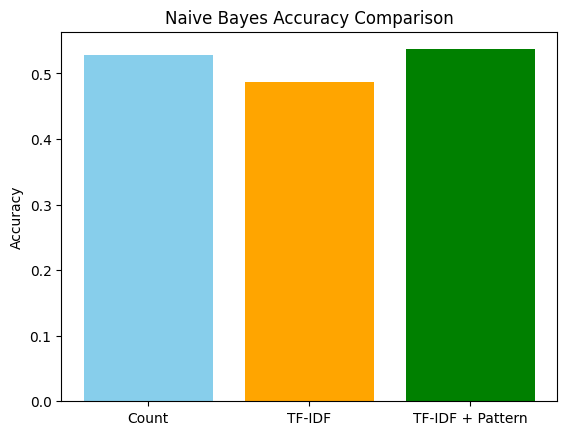

In [450]:
import matplotlib.pyplot as plt

acc_scores = [accuracy_score(y_test, y_pred_count),
              accuracy_score(y_test, y_pred_tfidf),
              accuracy_score(y_test, y_pred_tfidf_aug)]

labels = ['Count', 'TF-IDF', 'TF-IDF + Pattern']

plt.bar(labels, acc_scores, color=['skyblue','orange','green'])
plt.title('Naive Bayes Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()

The comparison indicates that the Naive Bayes classifier performs well on raw count features and slightly worse on pure TF-IDF features, \
as the TF-IDF weighting changes the distribution of values expected by the model. \
When frequent-pattern features are added to the TF-IDF representation, accuracy improves again, \
demonstrating that pattern augmentation contributes meaningful contextual information.

## Fourth
Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. \
There are somethings that are not ideal or the most efficient/meaningful. \
Each dataset can be handled differently as well. \
What are those inefficent parts you noticed? \
How can you improve the Data preprocessing for these specific datasets? \
This part is worth 10% of your grade.

* Text cleaning: Only part of unmeaningful words can be removed (5% top words and 1% bottom words), and some symbols remained in the text. \
   These tokens add noise to the data, and might influence the training process. \
   To deal with this, I can spend more time cleaning those unmeaningful tokens, also lowercasing all the words to normalize the words in the txt.
* Tokenization: since the tokenization we use (CountVectorizer) still cannot present real tokens on linguistic perspective, \
  this way of tokenization might cause noise to the data. \
  I can include more tokenizer to compare which is better.
* The dimension of text data are too high, leads to curse of dimensionality.
* For classification part, I can import more ways to classify the text data, not just two classification model.